In [1]:
# Load the PIL and numpy libraries
from PIL import Image
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
# Import the NetworkX library
import networkx as nx
import math
# Read image from disk using PIL
occupancy_map_img = Image.open('D:\Mobile Robotics\occupancy_map.png')
neighbours = [(-1,-1), (-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1),(0,0)]

# Interpret this image as a numpy array, and threshold its values to {0,1}
occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)

In [2]:
#Function that implements rejection sampling that samples a vertex from a known distribution and checks for the condition if the vertex is a free cell or not and accepts or rejects it
def rejection_sampling(M):
    while True:
        x = np.random.randint(0, M.shape[0], 1)
        x = (int(x))
        y = np.random.randint(0, M.shape[1], 1)
        y = (int(y))
        v = (x,y)
        if(M[v] > 0):
            return(v)
        else:
            continue

In [3]:
#implements the reachability check by paramterizing a line between the 2 points and finding if all the points in that line and its neighbours are free or occupied
def ReachabilityCheck(v1,v2): 
    
    #parameter for generating the points from v1 to v2, goes from 0 to 1 ie, from v goes from v1 to v2
    t = np.arange(0,1.001,0.001)
  
    for r in t:
        x = v1[0] + r*(v2[0]-v1[0])
        x = int(x)
        y = v1[1] + r*(v2[1]-v1[1])
        y = int(y)
        v = (x,y)
        
        if(v == v2):
            return True  
        
        else:
            for j in neighbours:
                if(occupancy_grid[v[0]+j[0]][v[1]+j[1]] == 0):
                    return False

In [4]:
#Function that adds a sampled vertex to the graph and the edges between vertices 
def AddVertex(i, v, d):
    G.add_node(i, pos=v)
    s = G.nodes.data('pos')
    for pos in s:
        if(pos[1] != v and math.dist(pos[1],v) <= d):
            if(ReachabilityCheck(pos[1],v)):
                G.add_edge(pos[0], i, weight = math.dist(pos[1],v))

In [5]:
#Function that constructs a PRM from the 2500 samples generated
def ConstructPRM(M, N, dmax):
    for i in range(0,N,1):
        vertex = rejection_sampling(M)       
        AddVertex(i, vertex, dmax)

In [6]:
G = nx.Graph()
ConstructPRM(occupancy_grid, 2500, 75)
#adding the start and goal vertices into the graph
start_index = G.number_of_nodes()+1
AddVertex(G.number_of_nodes()+1, (635,140), 75)
stop_index = G.number_of_nodes()+1
AddVertex(G.number_of_nodes()+1, (350,400), 75)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


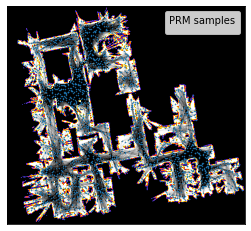

In [7]:
#plot for the construction of the PRM
nx.draw_networkx(G, pos=nx.get_node_attributes(G, 'pos'), node_size = 0.2, with_labels=False, width=0.01)
occupancy_grid[np.where(occupancy_grid > 0)] = 255
for i in G.nodes.data('pos'):
    occupancy_grid[i[1]] = 165
plt.imshow(np.transpose(occupancy_grid), cmap="CMRmap", origin='lower')
plt.legend(title="PRM samples")
plt.savefig('PRM samples.png', dpi=500)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


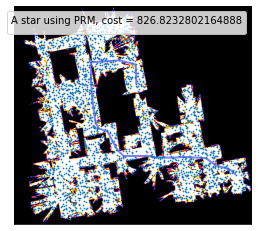

In [8]:
#plot for A star PRM
OptimalPath = nx.astar_path(G, start_index, stop_index)
cost = nx.astar_path_length(G, start_index, stop_index)

occupancy_grid[np.where(occupancy_grid > 0)] = 255

for j in range(len(OptimalPath)):
    if(j<len(OptimalPath)-1):
        nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, 'pos'), edgelist=[(OptimalPath[j], OptimalPath[j+1])], width=2, alpha=0.5, edge_color='b')
    
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G,'pos'), node_size = 0.5)

plt.imshow(np.transpose(occupancy_grid), cmap="CMRmap", origin='lower')
plt.legend(title="A star using PRM, cost = {}".format(cost))
plt.savefig('A star PRM.png', dpi=500)

plt.show()